# MODIS 01

In [1]:
import os
os.environ['GEMS_HOME'] = '/home/cogito/GEMS_python'

In [2]:
### Package Import
import sys
import os
base_dir = os.environ['GEMS_HOME']
project_path = os.path.join(base_dir, 'python-refactor')
sys.path.insert(0, project_path)
from Code.utils import matlab

import numpy as np
import glob
from osgeo import gdal
import subprocess
import tempfile

### Setting path
data_base_dir = os.path.join(project_path, 'Data')
raw_modis_path = os.path.join(data_base_dir, 'Raw', 'MODIS', 'MCD12Q1') 
path_mosaic = os.path.join(data_base_dir, 'Preprocessed_raw', 'MODIS', '01mosaic') #workspace = os.path.join(work_path, '01_mosaic')
tmpdirname = tempfile.TemporaryDirectory(dir=base_dir)  # will be deleted

flist = glob.glob(os.path.join(raw_modis_path, "*.hdf"))
flist.sort()
nfile = len(flist)

In [3]:
for k in range(0,nfile,14):
    flist_temp = flist[k:k+14]
    yr = os.path.basename(flist_temp[0])[9:13]
    
    input_files = [] 
    for m in range(0,14):
        fname = flist_temp[m]
        dst_dataset = os.path.join(tmpdirname.name, f"LC_{yr}_{m+1}.tif")
        
        gdal_dataset = gdal.Open(os.path.join(raw_modis_path, fname))
        src_dataset = gdal_dataset.GetSubDatasets()[0][0]
        subprocess.call(["gdal_translate", src_dataset, dst_dataset])
        input_files.append(dst_dataset)
    
    # Mosaic
    matlab.check_make_dir(path_mosaic) # debugging
    fname = f"EA_MCD12Q1_mosaic_{yr}.tif"
    out_filename = os.path.join(path_mosaic, fname)
    pixel_type = 'Int16'
    cmd = ["gdal_merge.py", "-n", "255", "-a_nodata", "-9999", "-ot", pixel_type, "-o", out_filename]
    cmd = cmd + input_files
    subprocess.call(cmd)
    
    tmpdirname.cleanup()
    print(yr)

2016


In [13]:
import rasterio as rio
from rasterio.plot import show

In [14]:
data = rio.open(out_filename)

In [15]:
data.read(1)

array([[    3,     3,     8, ..., -9999, -9999, -9999],
       [    3,     3,     3, ..., -9999, -9999, -9999],
       [    3,     3,     3, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ...,    17,    17,    17],
       [-9999, -9999, -9999, ...,    17,    17,    17],
       [-9999, -9999, -9999, ...,    17,    17,    17]], dtype=int16)

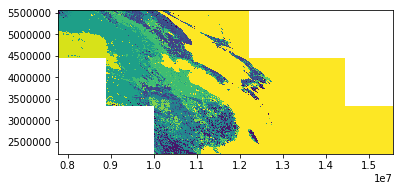

In [16]:
show(data)

In [17]:
data2 = rio.open('/home/cogito/GEMS_python/python-refactor/Data/Preprocessed_raw/MODIS/01mosaic/EA_MCD12Q1_mosaic_2016_arcpy.tif')

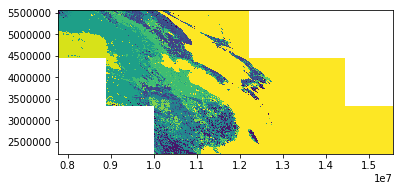

In [18]:
show(data2)